In [1]:
# Imports

# Usual imports
import os
import sys
import time
import datetime
import json
import csv
import glob
import pprint
import importlib
from tqdm import tqdm
from collections import Counter

#import quandl
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import itertools
import time
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('seaborn-talk')

# Plotting
import matplotlib.pyplot as plt
from matplotlib import cm, style
from matplotlib.ticker import FixedLocator
from matplotlib.dates import DateFormatter

import seaborn as sns
from IPython.display import Image
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter

# For regression
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# Custom modules
sys.path.insert(0, '../')
#import psychometry
import parser
import utils

# Some edits to matplotlib
# https://towardsdatascience.com/simple-ways-to-improve-your-matplotlib-b64eebccfd5
# https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
#plt.rcParams.update({'font.size': 20})
style.use('seaborn-talk') #sets the size of the charts

# This is the color of sh.rice.edu/covid-sense website background. It is NOT white
bg_color = (0.96862745, 0.96862745, 0.96862745)

# Convert a timestamp into time string
d2s = lambda x : datetime.datetime.fromtimestamp(x/1000.0).strftime('%B %d')

saveroot = '/home/vishwanath/Dropbox/Apps/Overleaf/CovidSense Analysis/figures'

In [2]:
# Load database
dbname = '../data/db_snapshot.json'
import os
cwd = os.getcwd()
print(cwd)
with open(dbname, 'rb') as readfile:
    db = json.load(readfile)
    
# Region names
us_state_region_name = '../data/states_regions.csv'

with open(us_state_region_name, 'r') as f:
    region_data = f.readlines()

name2region = dict()
for state in region_data:
    name, region = state.strip().replace(r'"', '').split(',')
    name2region[name] = region

d:\Dropbox\projects\covidsense\CE-EmaResponseAnalyzer\analysis


Empty DataFrame
Columns: [age, gender, timestamp, news, pre-physical, pre-mental]
Index: []
(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]), <a list of 7 Text major ticklabel objects>)


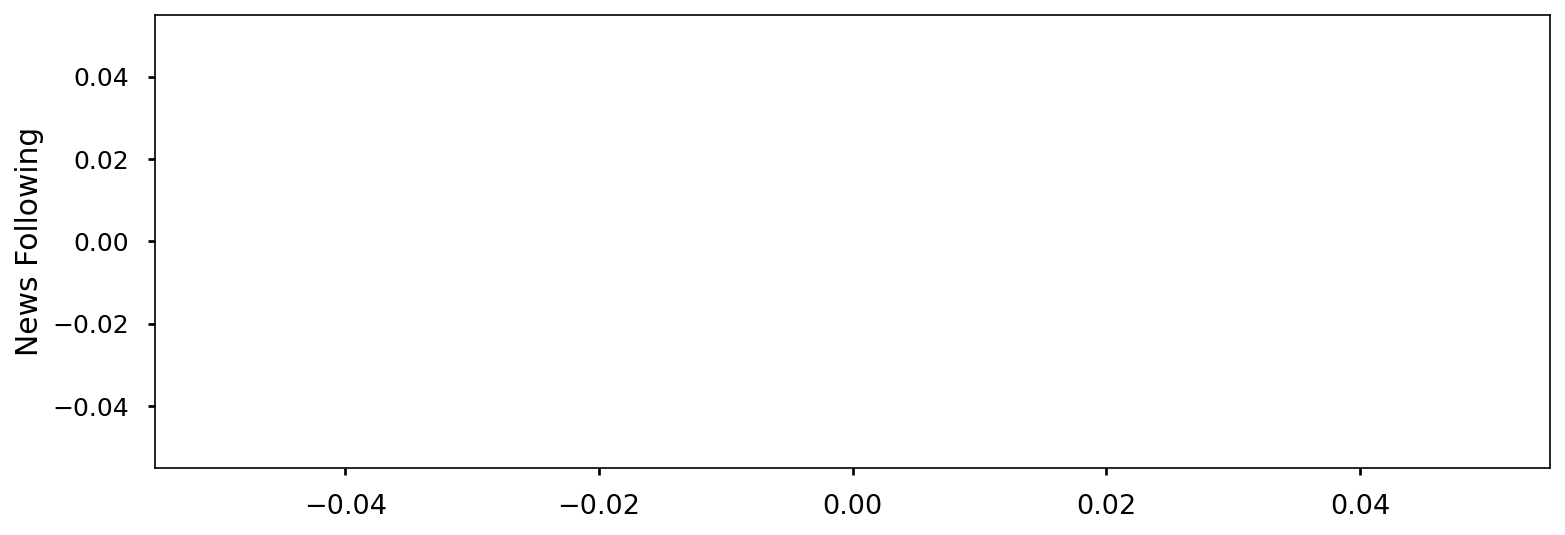

In [3]:
d2s = lambda x : datetime.datetime.fromtimestamp(x/1000.0).strftime('%m %d')

# Analyze News ids
news_ids = [key for key in db if len(db[key]['news']) > 0 and\
            db[key]['country'] is not None and db[key]['country'] == 'United States of America' and\
            db[key]['state'] != 'Puerto Rico' and\
            'news' in db[key]['news']]
rdb = {key:db[key] for key in news_ids}

# 'news_accuracy': [], 'news_stress': [], 'news_mental_health': [],       
news_dict = {'age':[], 'gender': [], 'timestamp': [], 'news': [], 'pre-physical': [], 'pre-mental': []}

const = 3600*24*2
#        news_dict['news_stress'].append(news_panels['news_stress'])
#        news_dict['news_mental_health'].append(news_panels['news_mental_health'])

for key in news_ids:

    pre_mental = rdb[key]['pre_mental']
    for val in pre_mental:
        pre_mental = [val is not 'none of the above' and val is not '(empty)']
    
    pre_physical = rdb[key]['pre_physical']
    for val in pre_physical:
        pre_physical = [val is not 'none of the above' and val is not '(empty)']
    
    news_panels = db[key]['news']
    for news_panels in news_panels:
        news_dict['news'].append(news_panels['news'])
        news_dict['timestamp'].append(const*(news_panels['timestamp'] // const))
    
    news_dict['age'].append(rdb[key]['age'])
    news_dict['gender'].append(rdb[key]['gender'])        

news_pd = pd.DataFrame.from_dict(news_dict)

print(news_pd)

fig = plt.figure(dpi=150, figsize=[12, 4])
sns.lineplot(x='timestamp', y='news', data=news_pd, label='News')
plt.xlabel('')
plt.ylabel('News Following')

timestamps, _ = plt.xticks()

print(plt.xticks())

#plt.xticks(timestamps, labels=[d2s(timestamp*1000) for timestamp in timestamps], rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)

plt.show()